<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Machine_Learning_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Pseudo-workshop

# KNNs and Validating Models

One of the most important pieces of machine learning is **model validation**: that is, checking how well your model fits a given dataset. But there are some pitfalls you need to watch out for.

Consider the digits example we've been looking at previously. How might we check how well our model fits the data?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
plt.style.use('seaborn')
digits = load_digits()
X = digits.data
y = digits.target

## K-Nearest Neighbors (KNN)

K-nearest neighbors is one of the simples classifier possible.

There is no "training", you simply classify any point by the $K$ nearest neighbour's class.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"{np.sum(y == y_pred)} / {len(y)} correct")

1797 / 1797 correct


It seems we have a perfect classifier!

**Question: what's wrong with this?**

It's *too* perfect. The model is overfit.

## Validation (Test) Sets

Above we made the mistake of testing our data on the same set of data that was used for training. 

**This is not a good idea**. If we optimize our estimator this way, we will tend to **over-fit** the data: that is, we learn the noise.

A better way to test a model is to use a hold-out set which doesn't enter the training. We've seen this before using scikit-learn's train/test split utility:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

Now we train on the training data, and validate on the test data.
Redo the process above with the new training and validation data

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5877690516441477
0.609680706644789


In [7]:
X_Train, X_Validate, y_Train, y_Validate = train_test_split(X_train, y_train)

In [21]:
model2 = LinearRegression().fit(X_Train, y_Train)
print(model2.score(X_Train, y_Train))
print(model2.score(X_Validate, y_Validate))

0.614763898285913
0.5956178116328741


In [22]:
print(model2.score(X_test, y_test))

0.6313382600203921


This gives us a more reliable estimate of how our model is doing.

The metric we're using here, comparing the number of matches to the total number of samples, is known as the **accuracy score**, and can be computed using the following routine. Check the score using y_test and y_pred

In [23]:
print(model2.score(X_test, y_test))

0.6313382600203921


This can also be computed directly from the ``model.score`` method:

In [24]:
knn.score(X_test, y_test)

1.0

Using this, we can ask how this changes as we change the model parameters, in this case the number of neighbors. Finish the missing code of the loop.

In [27]:
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X, y)
y_pred = knn.predict(X)
print(f"{np.sum(y == y_pred)} / {len(y)} correct")

1747 / 1797 correct


We see that in this case, a small number of neighbors seems to be the best option.

## Cross-Validation

One problem with validation sets is that you "lose" some of the data. Above, we've only used 3/4 of the data for the training, and used 1/4 for the validation. Another option is to use **2-fold cross-validation**, where we split the sample in half and perform the validation twice:

In [28]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

((898, 64), (899, 64))

In [29]:
print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.9832962138084632
0.982202447163515


Thus a two-fold cross-validation gives us two estimates of the score for that parameter.

Because this is a bit of a pain to do by hand, scikit-learn has a utility routine to help:

In [30]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

0.9749627560521414

### K-fold Cross-Validation

Here we've used 2-fold cross-validation. This is just one specialization of $K$-fold cross-validation, where we split the data into $K$ chunks and perform $K$ fits, where each chunk gets a turn as the validation set.
We can do this by changing the ``cv`` parameter above. Let's do 10-fold cross-validation:

In [32]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=10)

array([0.93333333, 0.99444444, 0.97222222, 0.97222222, 0.96666667,
       0.98333333, 0.99444444, 0.98882682, 0.97765363, 0.96648045])

Try it with differing k values!

In [34]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=8)

array([0.94666667, 0.98666667, 0.95111111, 0.96888889, 0.97333333,
       0.99553571, 0.98660714, 0.93303571])

In [35]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=5)

array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.95543175])

This gives us an even better idea of how well our model is doing.

## Overfitting, Underfitting and Model Selection

Now that we've gone over the basics of validation, and cross-validation, it's time to go into even more depth regarding model selection.

The issues associated with validation and 
cross-validation are some of the most important
aspects of the practice of machine learning.  Selecting the optimal model
for your data is vital, and is a piece of the problem that is not often
appreciated by machine learning practitioners.

Of core importance is the following question:

**If our estimator is underperforming, how should we move forward?**

- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

The answer is often counter-intuitive.  In particular, **Sometimes using a
more complicated model will give _worse_ results.**  Also, **Sometimes adding
training data will not improve your results.**  The ability to determine
what steps will improve your model is what separates the successful machine
learning practitioners from the unsuccessful.

### Illustration of the Bias-Variance Tradeoff

For this section, we'll work with a simple 1D regression problem.  This will help us to
easily visualize the data and the model, and the results generalize easily to  higher-dimensional
datasets.  We'll explore a simple **linear regression** problem.
This can be accomplished within scikit-learn with the `sklearn.linear_model` module.

We'll create a simple nonlinear function that we'd like to fit

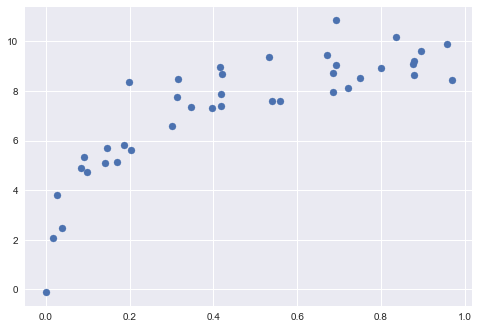

In [ ]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    return X, y

X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y)

Now say we want to perform a regression on this data.  Let's use the built-in linear regression function to compute a fit:

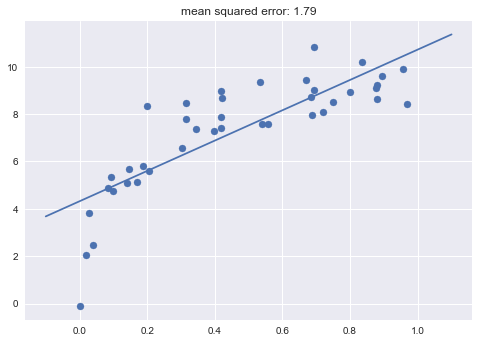

In [ ]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

Using sklearns R^2 score, check its error. Does this tell a different story to the MSE above? Write your answer below

In [ ]:
from sklearn.metrics import r2_score

We have fit a straight line to the data, but clearly this model is not a good choice.  We say that this model is **biased**, or that it **under-fits** the data.

Let's try to improve this by creating a more complicated model.  We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs. Scikit-learn makes this easy with the ``PolynomialFeatures`` preprocessor, which can be pipelined with a linear regression.

Let's make a convenience routine to do this:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Now we'll use this to fit a quadratic curve to the data. Use the Linear example above to fill in the missing code

In [ ]:
model = PolynomialRegression(2)


This reduces the mean squared error, and makes a much better fit.  What happens if we use an even higher-degree polynomial? Use the Linear example above to fill in the missing code

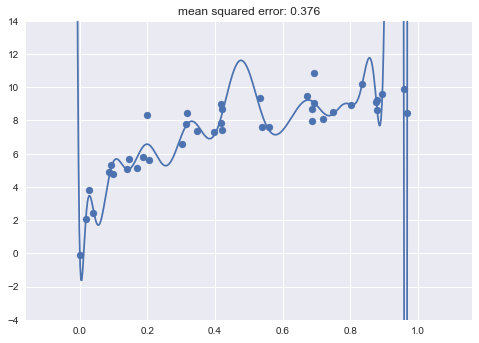

In [ ]:
model = PolynomialRegression(30)


When we increase the degree to this extent, it's clear that the resulting fit is no longer reflecting the true underlying distribution, but is more sensitive to the noise in the training data. For this reason, we call it a **high-variance model**, and we say that it **over-fits** the data.

Machine learning interview question:
Why is this example of overfitting dangerous? If your co-worker came to you with this issue what solution might you give them to remedy it?

### Detecting Over-fitting with Validation Curves

Clearly, computing the error on the training data is not enough (we saw this previously). As above, we can use **cross-validation** to get a better handle on how the model fit is working.

Let's do this here, again using the ``validation_curve`` utility. To make things more clear, we'll use a slightly larger dataset:

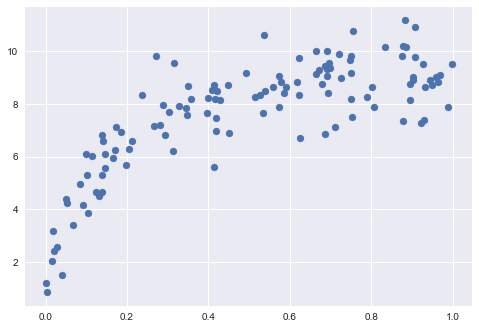

In [ ]:
X, y = make_data(120, error=1.0)
plt.scatter(X, y);

In [ ]:
from sklearn.model_selection import validation_curve

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

degree = np.arange(0, 18)
val_train, val_test = validation_curve(PolynomialRegression(), X, y,
                                       'polynomialfeatures__degree', degree, cv=7,
                                       scoring=rms_error)

/Users/mranger/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Now let's plot the validation curves:

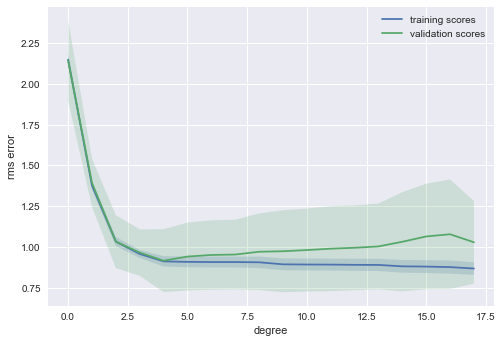

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(degree, val_train, label='training scores')
plot_with_err(degree, val_test, label='validation scores')
plt.xlabel('degree'); plt.ylabel('rms error')
plt.legend();

Notice the trend here, which is common for this type of plot.

1. For a small model complexity, the training error and validation error are very similar. This indicates that the model is **under-fitting** the data: it doesn't have enough complexity to represent the data. Another way of putting it is that this is a **high-bias** model.

2. As the model complexity grows, the training and validation scores diverge. This indicates that the model is **over-fitting** the data: it has so much flexibility, that it fits the noise rather than the underlying trend. Another way of putting it is that this is a **high-variance** model.

3. Note that the training score (nearly) always improves with model complexity. This is because a more complicated model can fit the noise better, so the model improves. The validation data generally has a sweet spot, which here is around 5 terms.

Machine learning interview questions:

If our training scores are very high but our validation scores are low what does that tell us about our model?

If we were to plot the test scores alongside the training and validation scores later, what would you hope to see?





Here's our best-fit model according to the cross-validation:

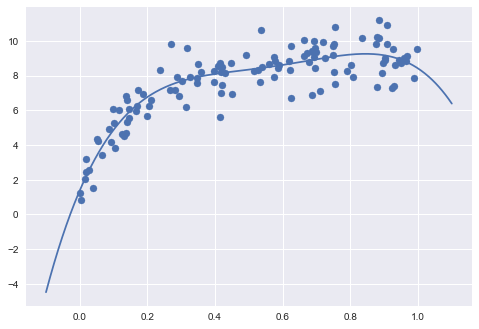

In [ ]:
model = PolynomialRegression(4).fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, model.predict(X_test));

## Validation in Practice: Grid Search

The preceding discussion is meant to give you some intuition into the trade-off between bias and variance, and its dependence on model complexity and training set size.
In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multi-dimensional surfaces.
In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides automated tools to do this in the grid search module.
Here is an example of using grid search to find the optimal polynomial model.
We will explore a three-dimensional grid of model features; namely the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem.
This can be set up using Scikit-Learn's ``GridSearchCV`` meta-estimator:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 4}

Using the new best estimator, do a new fit and check its progress

(-0.0497460489643619,
 1.0471832742331872,
 0.32518802905607225,
 11.690319277144514)

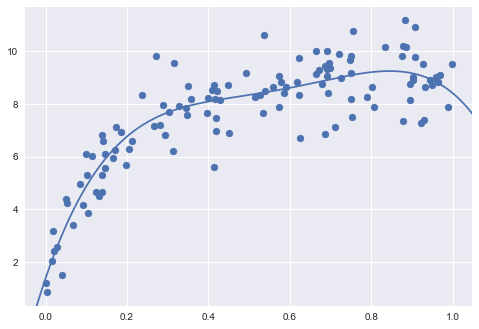

In [ ]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

# Decision Trees

Decision trees are a straightforward model type that is the basis for some of the most powerful models in machine learning.

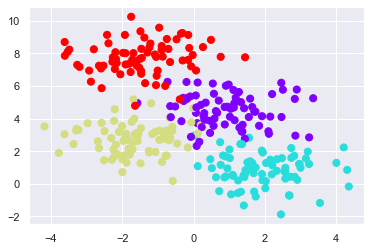

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set()

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.
This figure presents a visualization of the first four levels of a decision tree classifier for this data:

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


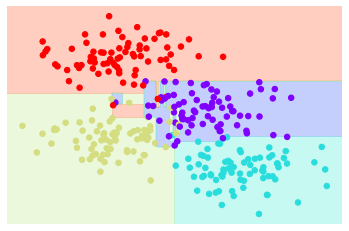

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
visualize_classifier(DecisionTreeClassifier(), X, y)

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions.
It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data.
That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


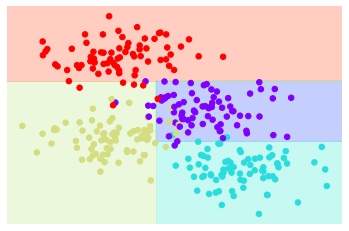

In [ ]:
visualize_classifier(DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4), X, y)

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


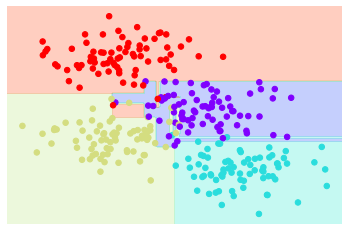

In [ ]:
visualize_classifier(DecisionTreeClassifier(max_depth=50, max_leaf_nodes=50), X, y)

Common machine learning interview questions, write your answers in the cell below:

1) Based on your understanding of decision trees, what do you think the parameters 'depth', 'leaf' and 'node' mean?

2) Which can you use decision trees for? Regression or Classification? 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
df.head()

skLearn packages all follow a very similar format when it comes to fitting a model.
You can split the data, fit a classifier/regressor, test it and then check its accuracy. Fill in the blanks below to familiarize yourself with the process. You will use it alot in future projects.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(___, ____, test_size=___, random_state =80)

The test size parameter above is the percentage of the original dataset that you want to set aside as your test data. Enter what you think is an appropriate number. E.g. 0.5 for 50%, 0.3 for 30%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(____)

In [ ]:
y_pred = classifier.predict(_____)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(____))
print(classification_report(_____))

Common machine learning interview questions, write your answers in the cell below:

Based on what you've learnt about discussing if a score or result is good enough, what is your opinion on how this decision tree did? 

If you could choose something to improve the dataset or experiment what might it be?

### Overfitting

Overfitting is a fundamental property of decision trees.

The key intuition to make these types of models better is to use **many bad models** rather than one strong one.

# Random Forests

Multiple overfitting estimators can be combined to average out into a good prediction. This is called **bagging**

Bagging makes use of an ensemble of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.

An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

## Checking out Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

NameError: ignored

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points.

In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Common machine learning interview questions, write your answers in the cell below:

1) One of the strengths of Random Forests is the 'bagging' process that it undergoes. In this process, data is sampled with replacement for each tree to be trained on. What does this mean? And why would a scientist choose to do this? Would you say its a strength?

2) The randomness in construction and sampling is considered one of the reasons to use Random forests over decision trees, why might you think this is?

## BONUS DETAILS: Gradient Boosted Decision Trees

The most popular libraries in this class of models are LightGBM, XGBoost and CatBoost.

These models are extremely popular because they are both powerful and fast to train. LightGBM is in fact the most used library in winning submissions on Kaggle!

LightGBM supports random forests as well, but GBDTs are the most interesting one.

GBDTs are similar to random forests, except they train trees one after the other, minimizing the **residual loss** (the difference between predicted quantities up to now and target) on each step.

/Users/mranger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


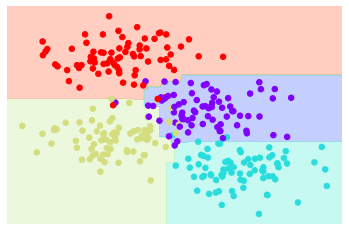

In [ ]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier(
    boosting_type='goss',
    num_leaves=15,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20,
)
visualize_classifier(model, X, y);

One disadvantage of GBDT models is that they have **many, many settings**. [Here](https://lightgbm.readthedocs.io/en/latest/Parameters.html) is a page going over them. [here](https://neptune.ai/blog/lightgbm-parameters-guide) is a good resource on tuning them.

In practice, you generally end up aggressively gridsearching over GBDTs.

# Support Vector Machines (SVM)

Support vector machines (SVMs) are a class of supervised algorithms for classification and regression.

They're not used much anymore compared to decision trees and deepnets, but they're worth seeing just for general culture.

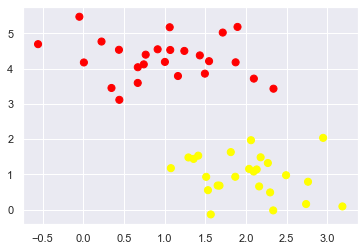

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set()

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

A linear **discriminative classifier** would attempt to draw a straight line separating the two sets of data.

The problem is that many such lines fit the data:

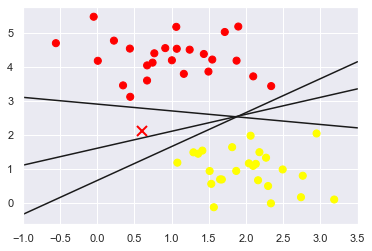

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Depending on which equivalent line you choose, a new data point will be assigned a different label.


## Support Vector Machines: Maximizing the *Margin*

The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.

Here is an example of how this might look:

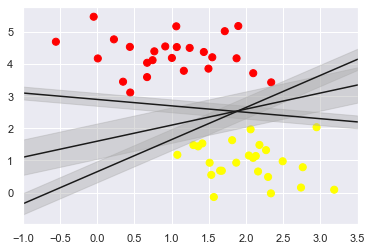

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

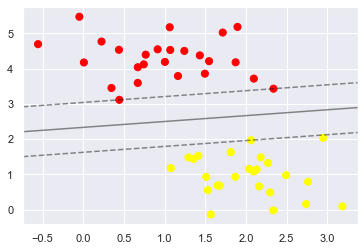

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

The points touching the outermost limits of the margin create the *support vectors*.

These are in the ``support_vectors_`` attribute:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

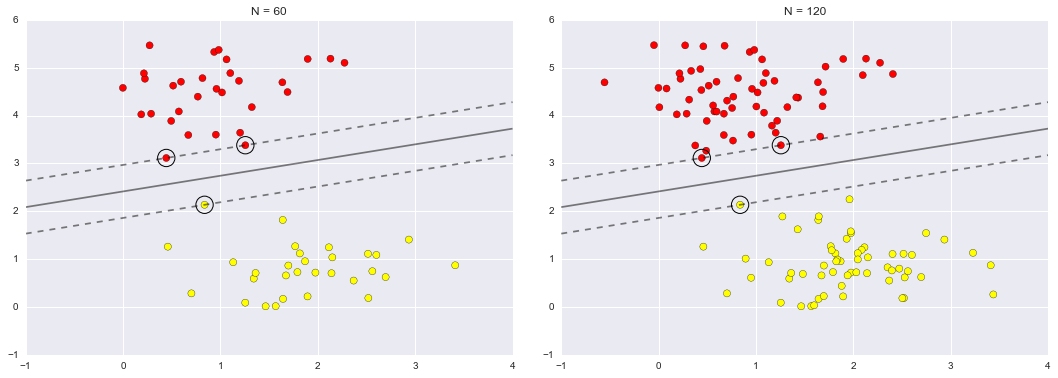

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points.
In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel.
This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

## Questions

SVM isn't as popular anymore due to datasets getting larger and the training time for it being much longer so its not imperative you learn how to use it immediately. Decision Trees/ Random Forests will serve you well for classification. However you may be asked questions about in an interview as a knowledge check for ML.

1) At a glance K-nearest neighbours and SVMs are rather similar in terms of their goal. In your opinion, where do they differ?

2) What would a case of over-fitting look like with a 2D SVM graph? How about underfitting?